In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
# fname = "C:/Users/AbhishekBhat/Downloads/20210813_FosTesting/out_mojo_left_20210812131741.csv"
fname = "C:/Users/AbhishekBhat/Downloads/20210813_FosTesting/out_mojo_left_20210813145930.csv"



In [2]:
df = pd.read_csv(fname, skiprows=[i for i in range(0,50) if i is not 4], header=4)

                 #['algo_qw', 'algo_qx', 'algo_qy', 'algo_qz'])


In [3]:
df.head()

,34838767,282,106,-40,-1026,-16995,964,6025,9825,-9350,...,-0.654438,0.704914,1,0.17768,-0.207732,-0.654662,0.704765,30.1328,2,Unnamed: 37
0,39715690,-34.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.654298,0.705015,1.0,0.177680,-0.207732,-0.654662,0.704765,30.1328,2.0,NaN
1,44591382,-21.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.654324,0.704990,1.0,0.177680,-0.207732,-0.654662,0.704765,30.1328,2.0,NaN
2,49468305,-21.0,6.0,-8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.654345,0.704968,1.0,0.177680,-0.207732,-0.654662,0.704765,30.1328,2.0,NaN
3,54345228,-29.0,5.0,-11.0,-869.0,-16936.0,494.0,6053.0,9820.0,-9336.0,...,-0.657101,0.702436,1.0,0.177056,-0.206346,-0.665479,0.695133,30.1055,2.0,NaN
4,59222151,-26.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.657129,0.702405,1.0,0.177056,-0.206346,-0.665479,0.695133,30.1055,2.0,NaN


In [4]:
#This is the et quat in ENU frame 
quat = df.iloc[:,26:30]

quat = quat.dropna(axis='rows')

# ET is is ENU. Convert to NED

# quat.head()

test_quat = pd.DataFrame()
# convert eye tracking quat to NED quat
test_quat['qw'] = quat.iloc[:,0]
test_quat['qx'] = quat.iloc[:,2]
test_quat['qy'] = quat.iloc[:,1]
test_quat['qz'] = -1*quat.iloc[:,3]

quat_ui = pd.DataFrame()
# convert eye tracking quat to UI quat
quat_ui['qw'] = quat.iloc[:,0]
quat_ui['qx'] = -1*quat.iloc[:,1]
quat_ui['qy'] = quat.iloc[:,3]
quat_ui['qz'] = quat.iloc[:,2]


In [5]:
quat.head()

,0.177877,-0.207766,-0.654438,0.704914
0,0.177982,-0.207774,-0.654298,0.705015
1,0.177966,-0.207792,-0.654324,0.704990
2,0.177965,-0.207801,-0.654345,0.704968
3,0.177977,-0.207667,-0.657101,0.702436
4,0.177983,-0.207678,-0.657129,0.702405


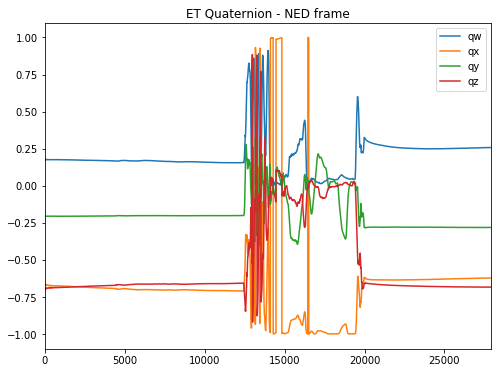

In [6]:
test_quat.plot(figsize=(8,6),title='ET Quaternion - NED frame')

In [7]:
# quat.shape

In [8]:
# quat.iloc[:,0]

In [9]:
# test_quat = pd.DataFrame()

# # convert eye tracking quat to ui engine quat
# test_quat['qw'] = quat.iloc[:,0]
# test_quat['qx'] = -1*quat.iloc[:,1]
# test_quat['qy'] = quat.iloc[:,3]
# test_quat['qz'] = quat.iloc[:,2]

# # test_quat.columns = ['qw', 'qx', 'qy', 'qz']

# print(test_quat.head())


In [10]:
from scipy.spatial.transform import Rotation as R
import numpy as np 
# # # Create a rotation object from Euler angles specifying axes of rotation
# rot = Rotation.from_euler('zyx', [0, 10, 0], degrees=True)

# # # Convert to quaternions and print
# rot_quat = rot.as_quat()
# for i in range(0,quat.shape[0]):
# test_quat = quat.iloc[0:10,:]

eul_angles_deg=[]
r = R.from_quat(test_quat.iloc[:,[1,2,3,0]]) # needs xyzw format
# rot_quat = [qarr[1],qarr[2],qarr[3],qarr[0]]
eul_angles_deg.append(r.as_euler('zyx', degrees=True))


# for i in range(0,test_quat.shape[0]):
#     r = R.from_quat(test_quat.iloc[i,0:4])
#     # rot_quat = [qarr[1],qarr[2],qarr[3],qarr[0]]
#     eul_angles_deg.append(r.as_euler('zyx', degrees=True))
    
    
#Update pandas frame
eul_angles_deg = np.array(eul_angles_deg)
eul_angles_deg.shape
# print(roll)
# print(type(roll))

test_quat['yaw'] = eul_angles_deg[0,:,0].tolist()
test_quat['pitch'] = eul_angles_deg[0,:,1].tolist()
test_quat['roll'] = eul_angles_deg[0,:,2].tolist()

print(test_quat.head())

quat_ui.to_csv("C:/Users/AbhishekBhat/Downloads/20210813_FosTesting/clipped.csv")

         qw        qx        qy        qz        yaw      pitch       roll
0  0.177982 -0.654298 -0.207774 -0.705015 -98.745512  58.061893 -83.765584
1  0.177966 -0.654324 -0.207792 -0.704990 -98.739458  58.062295 -83.774500
2  0.177965 -0.654345 -0.207801 -0.704968 -98.733449  58.062096 -83.781354
3  0.177977 -0.657101 -0.207667 -0.702436 -97.955770  58.127298 -84.546320
4  0.177983 -0.657129 -0.207678 -0.702405 -97.947044  58.126455 -84.555472


In [11]:
print(quat.head())
print(test_quat.head())

   0.177877  -0.207766  -0.654438  0.704914
0  0.177982  -0.207774  -0.654298  0.705015
1  0.177966  -0.207792  -0.654324  0.704990
2  0.177965  -0.207801  -0.654345  0.704968
3  0.177977  -0.207667  -0.657101  0.702436
4  0.177983  -0.207678  -0.657129  0.702405
         qw        qx        qy        qz        yaw      pitch       roll
0  0.177982 -0.654298 -0.207774 -0.705015 -98.745512  58.061893 -83.765584
1  0.177966 -0.654324 -0.207792 -0.704990 -98.739458  58.062295 -83.774500
2  0.177965 -0.654345 -0.207801 -0.704968 -98.733449  58.062096 -83.781354
3  0.177977 -0.657101 -0.207667 -0.702436 -97.955770  58.127298 -84.546320
4  0.177983 -0.657129 -0.207678 -0.702405 -97.947044  58.126455 -84.555472


In [12]:
#Read outut from UI engine
fname = "C:/Users/AbhishekBhat/Downloads/output_v3.txt"

df = pd.read_csv(fname,sep = r'[:\t,]')#, skiprows=[i for i in range(0,50) if i is not 4], header=4)

df = df[::2]

df = df.dropna(axis='columns')

print(df.head())

az = df.iloc[:,2]
el = df.iloc[:,1]
yaw = test_quat['yaw']
pitch = test_quat['pitch']
roll = test_quat['roll']
# df.head()





C:\Users\AbhishekBhat\Anaconda3\envs\cvenv\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


  quaternon  1.000000   0.000000
0    angles  0.000000   0.000000
2    angles  1.832589  90.000003
4    angles  1.832589  90.000003
6    angles  1.832589  90.000003
8    angles  1.832589  90.000003


Text(0.5, 1.0, 'Roll angle')

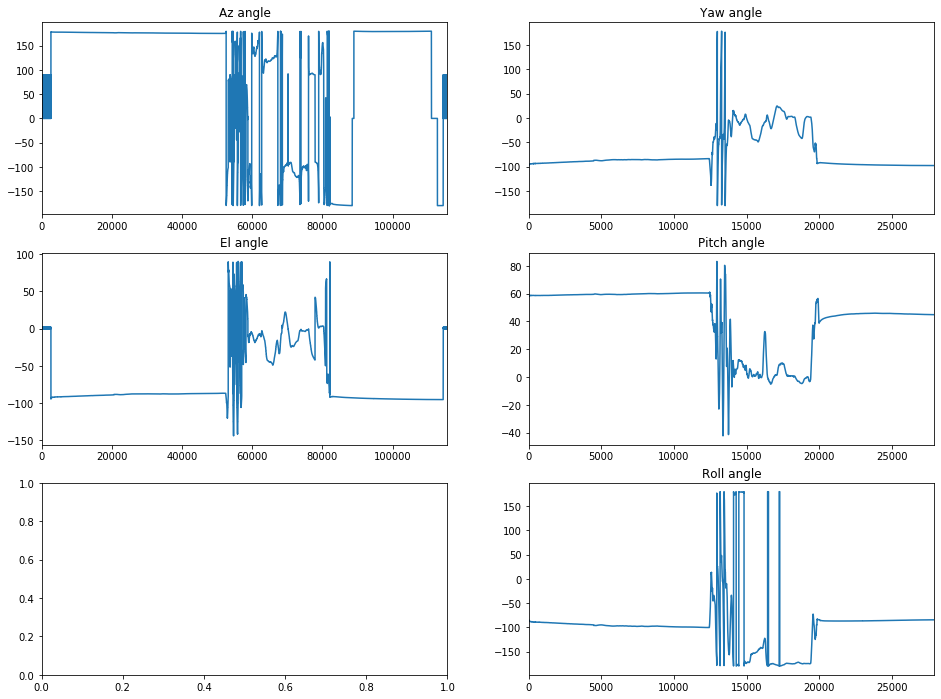

In [13]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

az.plot(ax = axes[0,0], subplots=True) 
axes[0,0].set_title('Az angle')
yaw.plot(ax = axes[0,1], subplots=True)
axes[0,1].set_title('Yaw angle')

el.plot(ax = axes[1,0], subplots=True) 
axes[1,0].set_title('El angle')

pitch.plot(ax = axes[1,1], subplots=True)
axes[1,1].set_title('Pitch angle')

roll.plot(ax = axes[2,1], subplots=True)
axes[2,1].set_title('Roll angle')


C:\Users\AbhishekBhat\Anaconda3\envs\cvenv\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


         qw        qx        qy        qz       yaw     pitch      roll
1  0.999952 -0.000122  0.002241 -0.009549 -1.094228  0.256922 -0.011527
3  0.999746 -0.000050  0.002243  0.022438  2.571453  0.256836 -0.011495
5  0.999952 -0.000122  0.002241 -0.009549 -1.094228  0.256922 -0.011527
7  0.999746 -0.000050  0.002243  0.022438  2.571453  0.256836 -0.011495
9  0.999952 -0.000122  0.002241 -0.009549 -1.094228  0.256922 -0.011527


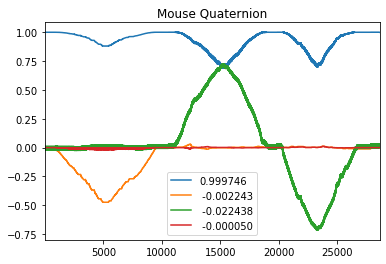

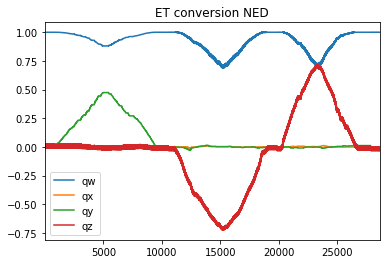

In [14]:
# Read out the quaternion and angles from mouse interactions in the ui engine 
fname = "C:/Users/AbhishekBhat/Downloads/output_mouse.txt"

df = pd.read_csv(fname, sep = r'[:\t,]')#, skiprows=[i for i in range(0,50) if i is not 4], header=4)


quats = df[1::2]

quats = quats.dropna(axis='columns')
quats = quats.iloc[:,1:5]
quats.plot(title='Mouse Quaternion')


test_quat = quats

# Convert mous quat to NED
test_quat = pd.DataFrame()

# convert ui engine quat to eye tracking quat ned
test_quat['qw'] = quats.iloc[:,0]
test_quat['qx'] = quats.iloc[:,3]
test_quat['qy'] = -1*quats.iloc[:,1]
test_quat['qz'] = -1*quats.iloc[:,2]


test_quat.plot(title='ET conversion NED' )


# Convert to ENU

eul_angles_deg=[]
r = R.from_quat(test_quat.iloc[:,[1,2,3,0]])
# rot_quat = [qarr[1],qarr[2],qarr[3],qarr[0]]
eul_angles_deg.append(r.as_euler('zyx', degrees=True))


# for i in range(0,test_quat.shape[0]):
#     r = R.from_quat(test_quat.iloc[i,0:4])
#     # rot_quat = [qarr[1],qarr[2],qarr[3],qarr[0]]
#     eul_angles_deg.append(r.as_euler('zyx', degrees=True))
    
    
#Update pandas frame
eul_angles_deg = np.array(eul_angles_deg)
eul_angles_deg.shape

test_quat['yaw'] = eul_angles_deg[0,:,0].tolist()
test_quat['pitch'] = eul_angles_deg[0,:,1].tolist()
test_quat['roll'] = eul_angles_deg[0,:,2].tolist()

yaw = test_quat['yaw']
pitch = test_quat['pitch']
roll = test_quat['roll']


print(test_quat.head())

# yaw.plot(title='yaw')
# pitch.plot(title='pitch')
# roll.plot(title='roll')




In [15]:
azel = df[::2]
azel = azel.dropna(axis='columns')

az = azel.iloc[:,2]
el = azel.iloc[:,1]



Text(0.5, 1.0, 'Roll angle')

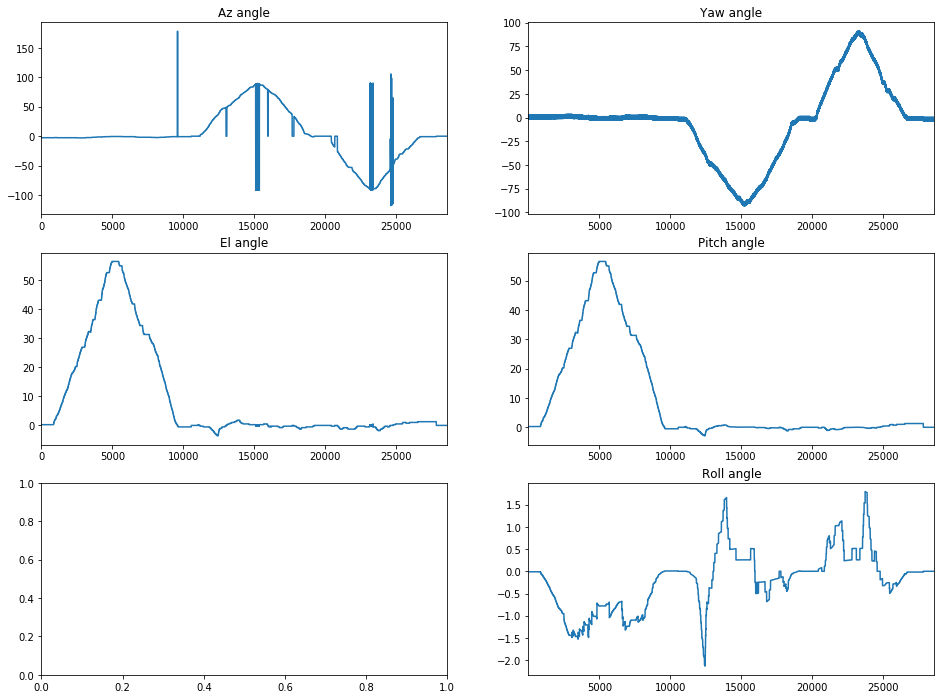

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

az.plot(ax = axes[0,0], subplots=True) 
axes[0,0].set_title('Az angle')
yaw.plot(ax = axes[0,1], subplots=True)
axes[0,1].set_title('Yaw angle')


el.plot(ax = axes[1,0], subplots=True) 
axes[1,0].set_title('El angle')

pitch.plot(ax = axes[1,1], subplots=True)
axes[1,1].set_title('Pitch angle')

roll.plot(ax = axes[2,1], subplots=True)
axes[2,1].set_title('Roll angle')

